In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import corner
import matplotlib.lines as mlines
current_path = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)

Parent Directory: /home/anibal-pc/roman_rubin


# Load files and compute metrics

## True parameters and the results of the fits

In [2]:
# path= parent_directory+'all_results/test_PB'
path = parent_directory+'/all_results/USBL'

fit_rr = pd.read_csv(path+"/fit_rr.csv")
fit_roman =  pd.read_csv(path+"/fit_roman.csv")
true = pd.read_csv(path+"/true.csv")

true['categories']=true['Category']
fit_rr['chi2']=fit_rr['chichi']
fit_roman['chi2']=fit_roman['chichi']

fit_rr["piE"]=np.sqrt(fit_rr["piEE"]**2+fit_rr["piEN"]**2)
fit_roman["piE"]=np.sqrt(fit_roman["piEE"]**2+fit_roman["piEN"]**2)
true["piE"]=np.sqrt(true["piEE"]**2+true["piEN"]**2)

In [6]:
print(len(true[true['sel_crit']==True]))
print(len(true))

6021
8609


In [12]:
# plt.hist(fit_rr['rho'])

# fit_rr[fit_rr['rho']<0]

In [7]:
fit_rr['id'] = fit_rr['Source']+5000*fit_rr['Set']
fit_roman['id'] = fit_roman['Source']+5000*fit_roman['Set']
true['id'] = true['Source']+5000*true['Set']


## Define metrics $\alpha$, $\beta$, $\gamma$

In [8]:
met_1_rr = pd.DataFrame(columns = true.columns)
met_1_roman= pd.DataFrame(columns = true.columns)
met_2_rr = pd.DataFrame(columns = true.columns)
met_2_roman= pd.DataFrame(columns = true.columns)
met_3_rr = pd.DataFrame(columns = true.columns)
met_3_roman= pd.DataFrame(columns = true.columns)
err_ratio= pd.DataFrame(columns = true.columns)
residuals_ratio= pd.DataFrame(columns = true.columns)



err_ratio['id'] = true['id']
residuals_ratio['id'] = true['id']
met_1_roman['id'] = true['id']
met_1_rr['id'] = true['id']
met_2_roman['id'] = true['id']
met_2_rr['id'] = true['id']
met_3_roman['id'] = true['id']
met_3_rr['id'] = true['id']

keys = ['t0','u0','te','rho','s',
        'q','alpha',
        'piEN','piEE','piE']
for key in ['Source',	'Set','categories','mass','sel_crit']:
    met_1_rr[key] = true[key]
    met_1_roman[key] = true[key]
    met_2_rr[key] = true[key]
    met_2_roman[key] = true[key]
    met_3_rr[key] = true[key]
    met_3_roman[key] = true[key]
    err_ratio[key] = true[key]
    residuals_ratio[key] = true[key]
    
for key in keys:
    met_1_rr[key] = abs(true[key]-fit_rr[key])/abs(true[key])
    met_1_roman[key] = abs(true[key]-fit_roman[key])/abs(true[key])
    met_2_rr[key] = abs(true[key]-fit_rr[key])/fit_rr[key+'_err']
    met_2_roman[key] = abs(true[key]-fit_roman[key])/fit_roman[key+'_err']
    met_3_rr[key] = abs(fit_rr[key+'_err']/fit_rr[key])
    met_3_roman[key] = abs(fit_roman[key+'_err']/fit_roman[key])
    err_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']
    residuals_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']

In [52]:
met_1_rr

,Source,Set,t0,u0,te,rho,s,q,alpha,piEN,piEE,Category,mass,sel_crit,categories,piE,id
0,0,1,4.062166e-06,0.347716,0.248951,0.995777,0.056492,0.883267,12.405502,0.231832,1.000000,NaN,58.22711449314874 solMass,True,A,0.249194,5000
1,3,1,4.060582e-06,0.558678,1.000000,0.999883,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,20.179690306598655 solMass,True,A,0.901612,5003
2,4,1,4.053658e-06,0.999144,0.996464,0.242296,0.806568,0.998493,0.722406,0.993762,0.381516,NaN,1.2106947488160011 solMass,False,D,0.844774,5004
3,9,1,4.060654e-06,0.462341,0.376488,0.705406,0.858040,0.940765,0.008623,0.460870,0.655013,NaN,87.29147154159371 solMass,True,A,0.388065,5009
4,10,1,4.061645e-06,0.096381,1.000000,0.999940,0.064611,0.999998,23.283273,1.000000,1.000000,NaN,13.342943313978438 solMass,True,B,1.000000,5010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,4982,4,6.109000e-09,0.000823,0.000664,0.518725,0.999794,0.964092,0.148940,0.004326,0.002275,NaN,96.70514538336947 solMass,True,A,0.002319,24982
8605,4983,4,4.038360e-06,0.139299,0.045750,0.156733,0.626376,0.999883,0.345705,0.999869,0.999702,NaN,76.25961664164595 solMass,True,A,0.999721,24983
8606,4987,4,4.060842e-06,0.438027,0.296837,0.933027,0.598922,0.996875,0.987170,1.000000,1.000000,NaN,87.90014437533695 solMass,True,A,1.000000,24987
8607,4990,4,4.060541e-06,0.355083,1.000000,0.999921,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,36.38834077486398 solMass,False,A,0.494595,24990


In [62]:
met_1_rr

,Source,Set,t0,u0,te,rho,s,q,alpha,piEN,piEE,Category,mass,sel_crit,categories,piE,id
0,0,1,4.062166e-06,0.347716,0.248951,0.995777,0.056492,0.883267,12.405502,0.231832,1.000000,NaN,58.22711449314874 solMass,True,A,0.249194,5000
1,3,1,4.060582e-06,0.558678,1.000000,0.999883,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,20.179690306598655 solMass,True,A,0.901612,5003
2,4,1,4.053658e-06,0.999144,0.996464,0.242296,0.806568,0.998493,0.722406,0.993762,0.381516,NaN,1.2106947488160011 solMass,False,D,0.844774,5004
3,9,1,4.060654e-06,0.462341,0.376488,0.705406,0.858040,0.940765,0.008623,0.460870,0.655013,NaN,87.29147154159371 solMass,True,A,0.388065,5009
4,10,1,4.061645e-06,0.096381,1.000000,0.999940,0.064611,0.999998,23.283273,1.000000,1.000000,NaN,13.342943313978438 solMass,True,B,1.000000,5010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,4982,4,6.109000e-09,0.000823,0.000664,0.518725,0.999794,0.964092,0.148940,0.004326,0.002275,NaN,96.70514538336947 solMass,True,A,0.002319,24982
8605,4983,4,4.038360e-06,0.139299,0.045750,0.156733,0.626376,0.999883,0.345705,0.999869,0.999702,NaN,76.25961664164595 solMass,True,A,0.999721,24983
8606,4987,4,4.060842e-06,0.438027,0.296837,0.933027,0.598922,0.996875,0.987170,1.000000,1.000000,NaN,87.90014437533695 solMass,True,A,1.000000,24987
8607,4990,4,4.060541e-06,0.355083,1.000000,0.999921,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,36.38834077486398 solMass,False,A,0.494595,24990


In [78]:
axs.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

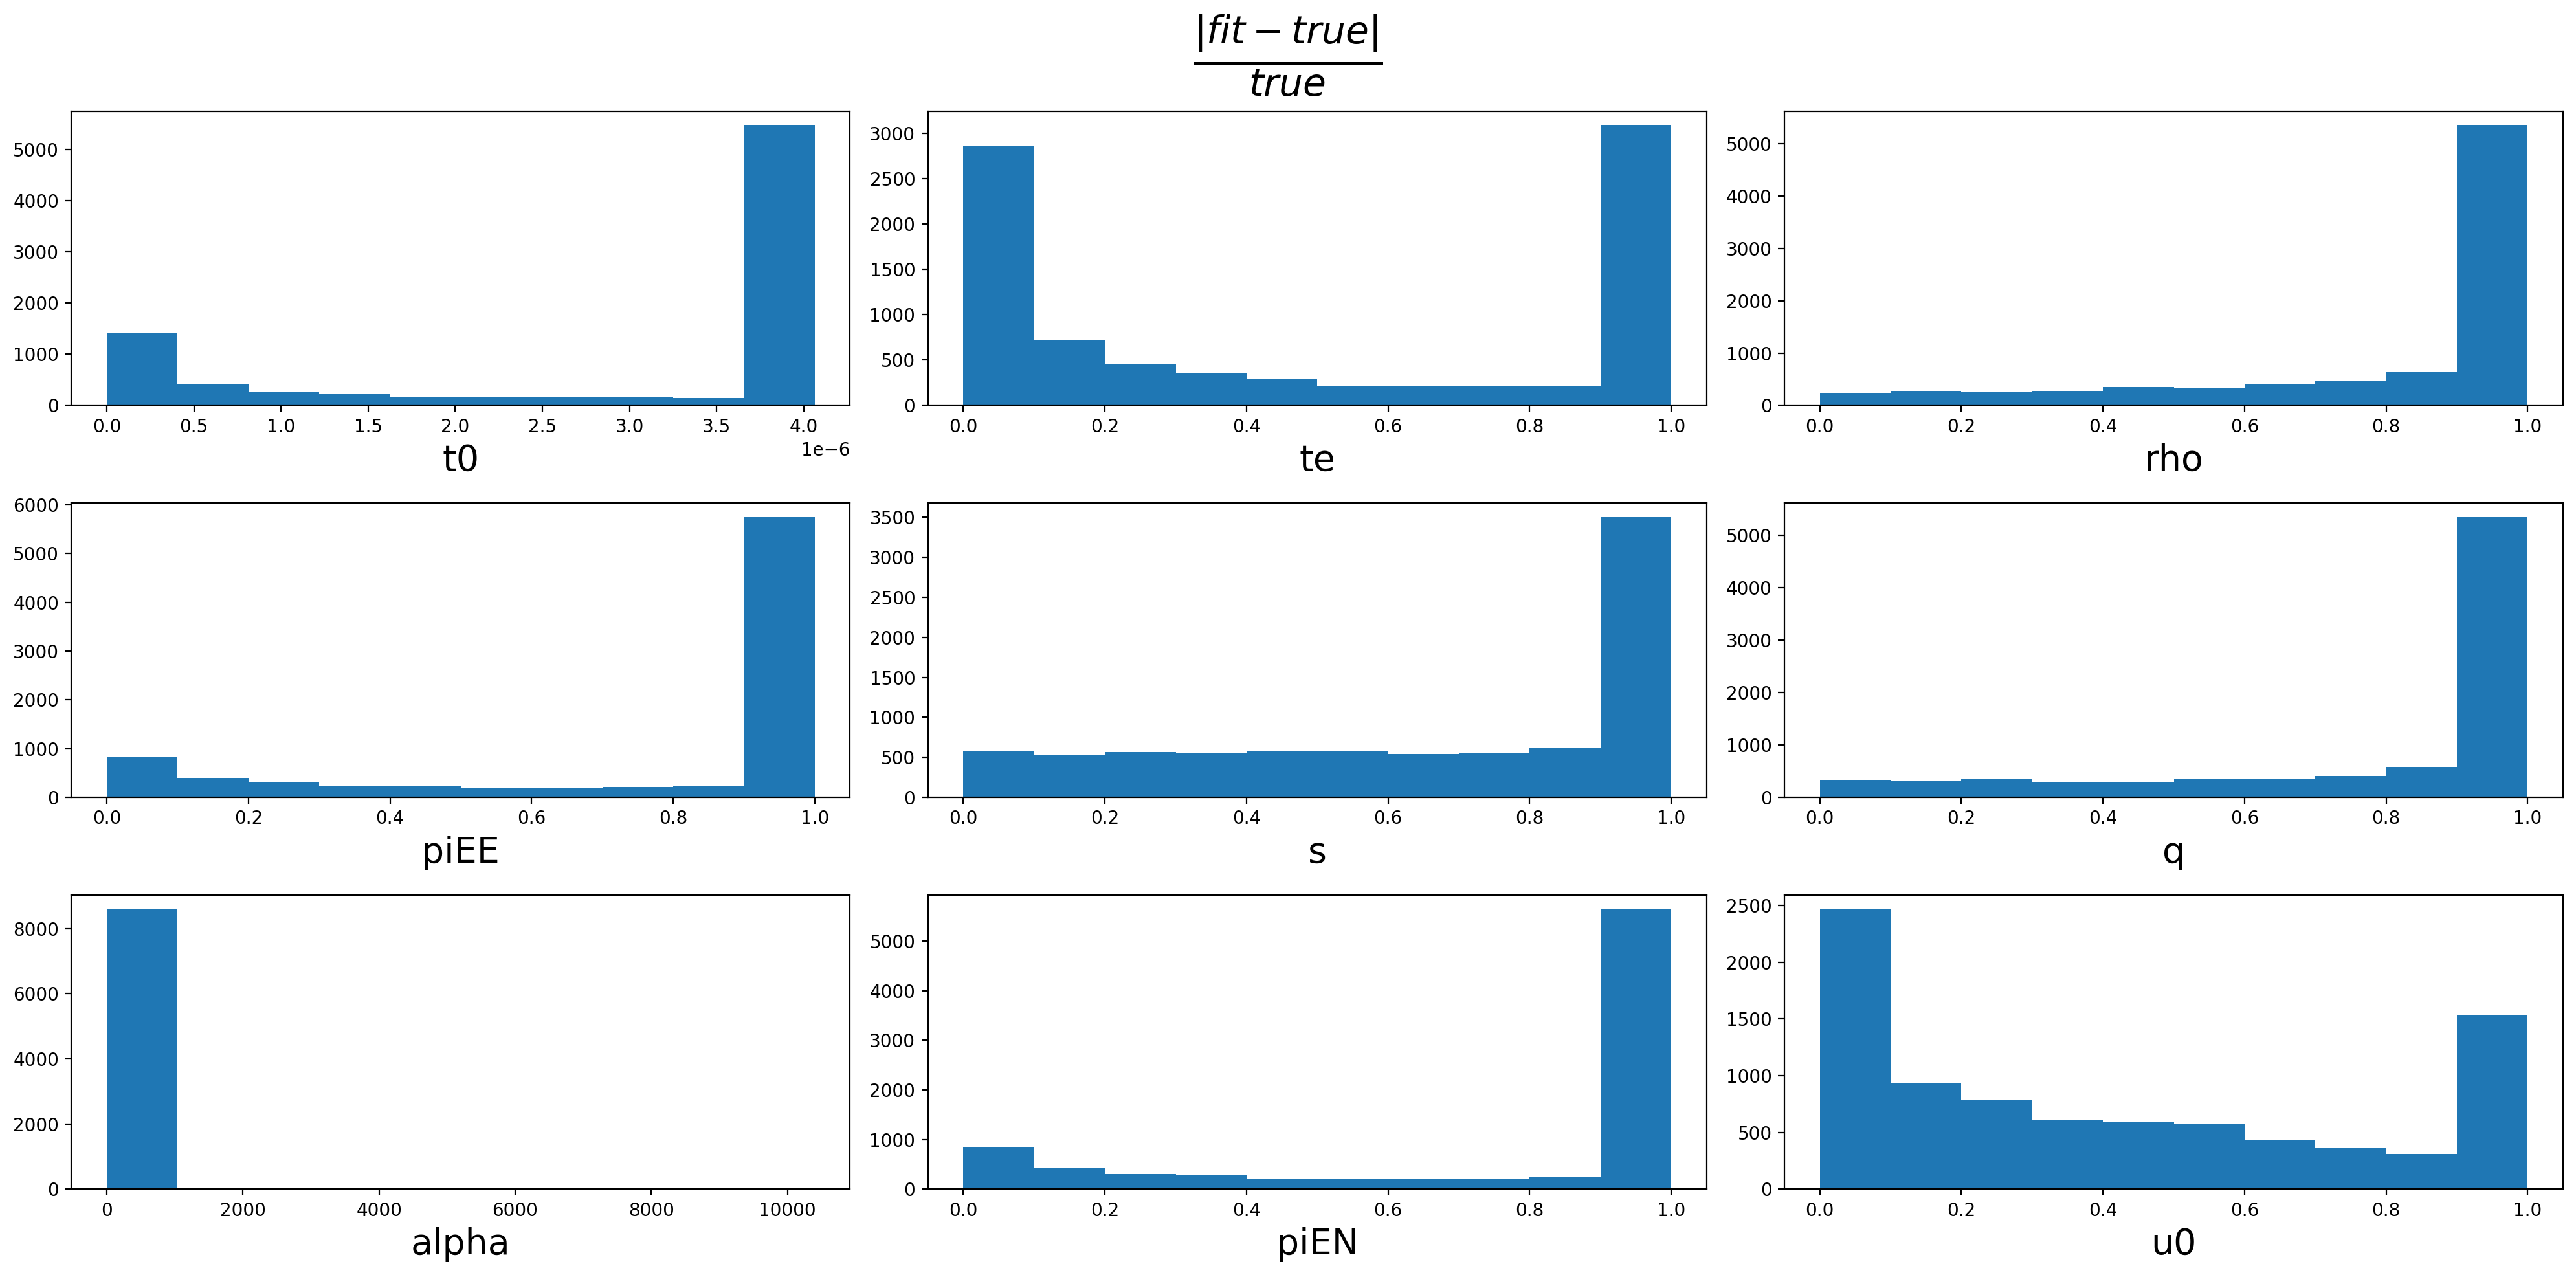

In [89]:
columns_to_check = [ 't0','te','rho','piEE','s','q','alpha','piEN','u0']
fig, axs = plt.subplots(3,3,figsize=(20,10),dpi=200)
axs = axs.flatten()
for i,p in enumerate(columns_to_check):
    ax = axs[i]
    ax.hist(met_1_rr[p])
    ax.set_xlabel(p, fontsize=20)
    # ax.set_ylabel(p)
plt.suptitle(r'$\frac{|fit-true|}{true}$',fontsize=30)
plt.tight_layout()

## Focus only on the good events
Defined as those that dont hit the boundaries of the region given to maximize the likelihood during the estimation of the parameters.

In [91]:
# Columns to consider for exclusion criteria
columns_to_check = [ 'te','rho','piEE','s','q','alpha','piEN','u0']
df =met_1_rr
# Exclude rows where the specified columns have values between 0 and 1
# df = met_1_rr
def filter_df(df):
    '''
    remove rows where any of the specified columns (columns_to_check) contain values between 0.97 and 1.16
    '''
    filtered_df = df[((df[columns_to_check] > 0.97) & (df[columns_to_check] < 1.16)).any(axis=1)]
    return filtered_df
    
source_rr = filtered_df['id']

df = met_1_roman
filtered_df = df[~((df[columns_to_check] > 0.97) & (df[columns_to_check] < 1.16)).any(axis=1)]
source_roman = filtered_df['id']

source_intersection = source_rr[source_rr.isin(source_roman)]
# source_intersection = true['id']

In [95]:
met_1_rr_fil = filter_df(met_1_rr)

met_1_rr_fil[met_1_rr_fil['sel_crit']==True]

,Source,Set,t0,u0,te,rho,s,q,alpha,piEN,piEE,Category,mass,sel_crit,categories,piE,id
0,0,1,4.062166e-06,0.347716,0.248951,0.995777,0.056492,0.883267,12.405502,0.231832,1.000000,NaN,58.22711449314874 solMass,True,A,0.249194,5000
1,3,1,4.060582e-06,0.558678,1.000000,0.999883,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,20.179690306598655 solMass,True,A,0.901612,5003
4,10,1,4.061645e-06,0.096381,1.000000,0.999940,0.064611,0.999998,23.283273,1.000000,1.000000,NaN,13.342943313978438 solMass,True,B,1.000000,5010
7,17,1,4.060944e-06,1.000000,0.630871,0.999685,1.000000,1.000000,0.202920,1.000000,1.000000,NaN,90.23402890328413 solMass,True,A,0.073666,5017
8,18,1,3.295669e-06,0.282687,0.317848,0.990000,0.069334,0.793461,0.104203,0.955729,0.410558,NaN,18.661631122898523 solMass,True,A,0.431668,5018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,4980,4,4.061065e-06,0.999999,0.798681,0.987041,0.924890,0.999937,0.999991,0.999999,1.000000,NaN,42.88582896147264 solMass,True,A,0.999999,24980
8604,4982,4,6.109000e-09,0.000823,0.000664,0.518725,0.999794,0.964092,0.148940,0.004326,0.002275,NaN,96.70514538336947 solMass,True,A,0.002319,24982
8605,4983,4,4.038360e-06,0.139299,0.045750,0.156733,0.626376,0.999883,0.345705,0.999869,0.999702,NaN,76.25961664164595 solMass,True,A,0.999721,24983
8606,4987,4,4.060842e-06,0.438027,0.296837,0.933027,0.598922,0.996875,0.987170,1.000000,1.000000,NaN,87.90014437533695 solMass,True,A,1.000000,24987


In [48]:
# Find rows where ALL values in columns_to_check are within the range

rows_in_rr = met_1_rr[((met_1_rr[columns_to_check] > 0.97) & (met_1_rr[columns_to_check] < 1.16)).all(axis=1)]
rows_in_roman = met_1_roman[((met_1_roman[columns_to_check] > 0.97) & (met_1_roman[columns_to_check] < 1.16)).all(axis=1)]
print(len(rows_in_rr[rows_in_rr['sel_crit']==True]))
print(len(rows_in_rr[rows_in_rr['sel_crit']==False]))

587
43
38


In [19]:
true = true[true['id'].isin(source_intersection)]
fit_rr = fit_rr[fit_rr['id'].isin(source_intersection)]
fit_roman = fit_roman[fit_roman['id'].isin(source_intersection)]
met_1_rr = met_1_rr[met_1_rr['id'].isin(source_intersection)]
met_2_rr = met_2_rr[met_2_rr['id'].isin(source_intersection)]
met_3_rr = met_3_rr[met_3_rr['id'].isin(source_intersection)]
met_1_roman = met_1_roman[met_1_roman['id'].isin(source_intersection)]
met_2_roman =  met_2_roman[met_2_roman['id'].isin(source_intersection)]
met_3_roman = met_3_roman[met_3_roman['id'].isin(source_intersection)]
err_ratio = err_ratio[err_ratio['id'].isin(source_intersection)]
residuals_ratio = residuals_ratio[residuals_ratio['id'].isin(source_intersection)]

In [ ]:
plt.hist(met_1_rr['te'])

In [ ]:
print(set(true['Category']))
print(len(true[true['Category']=='A']))
print(len(true[true['Category']=='B']))

# Plots

## True parameters as distributions

In [ ]:
params = ['t0', 'u0', 'te', 'rho', 's', 'q', 'alpha', 'piEE', 'piEN']

# Create subplots
n_rows = 3  # Number of rows in the grid
n_cols = 3  # Number of columns in the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through parameters and corresponding axes
for i, p in enumerate(params):
    ax = axes[i]
    ax.hist(true[p], alpha=0.4, label='True')
    ax.hist(fit_rr[p], histtype='step', lw=3, label='Fit RR')
    ax.hist(fit_roman[p], histtype='step', lw=3, label='Fit Roman')
    # ax.set_yscale('log')
    ax.set_xlabel(p)
    ax.legend()

# Remove empty subplots (if any)
for i in range(len(params), len(axes)):
    fig.delaxes(axes[i])

# Show the final grid of histograms
plt.show()


## Estimated values

In [ ]:
labelsparams = lambda p: labels[p]
label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'
label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1]})

q='te'
ax.plot(true['q'], true['s'], marker='o', ls='') #,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.plot(true['q'][true['id'].isin(err_ratio['id'][err_ratio['q']<0.25])], true['s'][true['id'].isin(err_ratio['id'][err_ratio['q']<0.25])], marker='x',ls='',color='red',label='Events with\n'+r'$\frac{\sigma(q)_{RR}}{\sigma(q)_{Roman}}<0.25$')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.set_xlabel(r'$q$',fontsize=20)
ax.set_ylabel(r'$s$',fontsize=20)
ax.set_xlim(0,0.01)
ax.set_ylim(0,10)

ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

# Histogram settings
#binwidth = 0.1
ax_histx.hist(true['q'], bins=np.arange(0, 0.01, 0.0005), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue')
ax_histx.hist(true['q'][true['id'].isin(err_ratio['id'][err_ratio['q']<0.25])], bins=np.arange(0, 0.01, 0.0005), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson')

ax_histy.hist(true['s'], bins=np.arange(0, 18, 1), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
ax_histy.hist(true['s'][true['id'].isin(err_ratio['id'][err_ratio['q']<0.25])], bins=np.arange(0, 18, 1), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson', orientation='horizontal')

ax_histy.set_xscale("log")
ax_histx.set_yscale("log")

# Remove ticks from inset histograms
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.tick_params(axis="y", left=False, labelleft=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
ax.legend(loc='best',fontsize=20)


In [ ]:
# true['te'][true['id'].isin(err_ratio['id'][err_ratio['piE']<0.25])]

# err_ratio['piE']

In [ ]:

fig, ax = plt.subplots(1, 1, figsize = (12, 5), sharey=True, gridspec_kw={'width_ratios': [1]})

q='te'
ax.plot(true['te'],true['piE'],marker='o',ls='')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.plot(true['te'][true['id'].isin(err_ratio['id'][err_ratio['piE']<0.25])], true['piE'][true['id'].isin(err_ratio['id'][err_ratio['piE']<0.25])],marker='x',ls='',color='red',label='Events with\n'+r'$\frac{\sigma(\pi_E)_{RR}}{\sigma(\pi_E)_{Roman}}<0.25$')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.set_xlabel(r'$t_E [days]$',fontsize=20)
ax.set_ylabel(r'$\pi_E$',fontsize=20)

ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

# Histogram settings
#binwidth = 0.1

ax_histx.hist(true['te'], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
ax_histx.hist(true['te'][true['id'].isin(err_ratio['id'][err_ratio['piE']<0.25])], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='blue')

ax_histy.hist(true['piE'], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
ax_histy.hist(true['piE'][true['id'].isin(err_ratio['id'][err_ratio['piE']<0.25])], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson', orientation='horizontal')

#ax_histy.set_xscale("log")
# Remove ticks from inset histograms

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.tick_params(axis="y", left=False, labelleft=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
ax.legend(loc='best',fontsize=20)


## Metrics

### Functions to create plots

In [ ]:
def create_hist2d_with_marginals(ax, x, y, labels, p, first_col=False):

    tex_label = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piE':'\pi_{E}', 'piEN':'\pi_{EN}'}
    # Main scatter plot
    hb = ax.hist2d(x, y, bins=(np.arange(0, 1.9, 0.1), np.arange(0, 1.9, 0.1)), cmap='Greens')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)

    # Create inset axes for the histograms
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

    # Histogram settings
    binwidth = 0.1
    ax_histx.hist(x, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
    ax_histy.hist(y, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')

    # Remove ticks from inset histograms
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.tick_params(axis="y", left=False, labelleft=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
    # ax_histy.set_yscale("log")
    # Add vertical and horizontal lines
    ax_histx.axvline(1, color='red', ls='--')
    ax_histy.axhline(1, color='red', ls='--')
    ax.axvline(1, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axvline(0, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axhline(0, xmin=0, xmax=0.5, lw=2, color='red')
    ax.axhline(1, xmin=0, xmax=0.5, lw=2, color='red')

    # Set labels with LaTeX formatting
    # label_m1 = lambda p: r'$\frac{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{RR}}{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{R}}$'
    # label_m2 = r'$\frac{\sigma_{RR}}{\sigma_{Roman}}$'
    labelx, labely =labels[0],labels[1]
    ax.set_xlabel(labelx, fontsize=20)
    
    # ax.set_xlabel("a",fontsize=20)
    # if first_col:
    ax.set_ylabel(labely, fontsize=20)

    # Add a colorbar inside the main plot
    cax = ax.inset_axes([0.85, 0.05, 0.03, 0.35], transform=ax.transAxes)
    cbar = plt.colorbar(hb[3], cax=cax, orientation='vertical')
    # cax.set_yticks([0, 50, 1000])
    # cax.set_yticklabels([0, 100, 2000], fontsize=8)
    x_min=0
    x_max=1
    y_min=0
    y_max=1
    fil_x= x[(y<1)&(y>0)]
    filtered=fil_x[(fil_x<1)&(fil_x>0)]

    number_in_square = len(filtered)/len(y)
    text = f"Fraction of events\n in [{x_min},{x_max}] x [{y_min},{y_max}]= {round(number_in_square ,2)}"  # Insert the number here
    ax.set_title(text, fontsize = 16)


def plot_histogram(ax, DATA, p, colors, some_flag=False):
    # print(data)
    sources = DATA['Source'].values
    data = DATA[p]   
    lab_latex = {'te':'tE(days)','rho':'\\rho' ,'piE':'\pi_E','q':'q'}
    data_label = lab_latex[p]
    lab_latex_legend = {'te':'t_E','rho':'\\rho','piE':'\pi_E','q':'q'}
    xlabel=r'$log_{10}'+f"[{lab_latex[p]}]$"
    
    masks_rr = lambda p, label: [
        (met_1_rr[p][met_1_rr['Source'].isin(sources)] < 0.25, 'r', f"$\\alpha({label})<0.25$"),
        (met_2_rr[p][met_2_rr['Source'].isin(sources)] < 0.25, 'k', f"$\\beta({label})<0.25$"),
        (met_3_rr[p][met_3_rr['Source'].isin(sources)] < 0.25, 'g', f"$\\gamma({label})<0.25$"),
    ]
    masks_roman = lambda p, label:[
        (met_1_roman[p][met_1_roman['Source'].isin(sources)] < 0.25, 'r', f"$\\alpha({label})<0.25$"),
        (met_2_roman[p][met_2_roman['Source'].isin(sources)] < 0.25, 'k', f"$\\beta({label})<0.25$"),
        (met_3_roman[p][met_3_roman['Source'].isin(sources)] < 0.25, 'g', f"$\\gamma({label})<0.25$"),
    ]
    
    if some_flag:
        masks = masks_roman(p,lab_latex_legend[p])
        dataset = 'Roman'
        met_1 = met_1_roman[met_1_roman['Source'].isin(sources)]
        met_2 = met_2_roman[met_2_roman['Source'].isin(sources)]
        met_3 = met_3_roman[met_3_roman['Source'].isin(sources)]
    else:
        masks = masks_rr(p,lab_latex_legend[p])
        dataset = 'Roman and Rubin'
        met_1 = met_1_rr[met_1_rr['Source'].isin(sources)]
        met_2 = met_2_rr[met_2_rr['Source'].isin(sources)]
        met_3 = met_3_rr[met_3_rr['Source'].isin(sources)]

    # Plot the histogram of the true values
    ax.hist(np.log10(data), bins=30, color='royalblue', alpha=0.5, label=f'True value of ${lab_latex_legend[p]}$')
    
    # Iterate over the masks and plot the masked data

    for (mask, color, label) in masks:
        mask = mask.reindex(data.index, fill_value=False)
        
        masked_data = data[mask]
        ax.hist(np.log10(masked_data), 
                bins=30, histtype='step', color=color, lw=2, label=label)
    
    # Set labels and title
    # print(xlabel)


    ax.set_xlabel(xlabel, fontsize=20)
    
    ax.set_title('Percentage of events with:\n'+
                 f"$\\alpha({lab_latex_legend[p]})<0.25: $"+
                 f"{round(100*len(met_1[p][met_1[p]<0.25])/len(data),2)}%, "+'\n'+
                 f"$\\beta({lab_latex_legend[p]})<0.25: $"+f"{round(100*len(met_2[p][met_2[p]<0.25])/len(data),1)}%, "+'\n'+
                 f"$\\gamma({lab_latex_legend[p]})<0.25: $"+f"{round(100*len(met_3[p][met_3[p]<0.25])/len(data),2)}%",fontsize=15)
    ax.legend(fontsize=10)
    # ax.set_xticks([1,2,3,4],fontsize=12)
    
    ax.grid()

## Histograms 2D metrics and metrics ratio

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1,1, 1]})
x = residuals_ratio['te'][residuals_ratio["id"].isin(source_rr)]
y = err_ratio['te'][err_ratio["id"].isin(source_rr)]
x2 = residuals_ratio['rho'][residuals_ratio["id"].isin(source_rr)]
y2 = err_ratio['rho'][err_ratio["id"].isin(source_rr)]
x3 = residuals_ratio['piE'][residuals_ratio["id"].isin(source_rr)]
y3 = err_ratio['piE'][err_ratio["id"].isin(source_rr)]
print(len(x3))

create_hist2d_with_marginals(axes[0], x, y, ["$\\frac{|t_E^{Fit}-t_E^{True}|_{RR} }{ |t_E^{Fit}-t_E^{True}|_{Roman}}$","$\\sigma_{RR}/\\sigma_{Roman}$"], 'te', first_col=True)
create_hist2d_with_marginals(axes[1], x2, y2, ["$\\frac{|\\rho^{Fit}-\\rho^{True}|_{RR} }{ |\\rho^{Fit}-\\rho^{True}|_{Roman}}$","$\\sigma_{RR}/\\sigma_{Roman}$"], 'rho')
create_hist2d_with_marginals(axes[2], x3, y3, ["$\\frac{|\\pi_E^{Fit}-\\pi_E^{True}|_{RR} }{ |\\pi_E^{Fit}-\\pi_E^{True}|_{Roman}}$","$\\sigma_{RR}/\\sigma_{Roman}$"], 'piE')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1,1, 1]})
x = met_1_rr['te']
y = met_2_rr['te']
x2 = met_2_rr['te']
y2 = met_3_rr['te']
x3 = met_1_rr['piE']
y3 = met_3_rr['piE']
# print(x3)
labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piE':'\pi_{E}', 'piEN':'\pi_{EN}'}

p='te'
create_hist2d_with_marginals(axes[0], x, y, ['$\\alpha$'+f"(${labels[p]}$)",r'$\beta$'+f"(${labels[p]}$)"], p, first_col=True)
create_hist2d_with_marginals(axes[1], x2, y2, ['$\\beta$'+f"(${labels[p]}$)",r'$\gamma$'+f"(${labels[p]}$)"], p)
create_hist2d_with_marginals(axes[2], x3, y3, ['$\\alpha$'+f"(${labels[p]}$)",r'$\gamma$'+f"(${labels[p]}$)"], p)

plt.tight_layout()
plt.show()

In [ ]:
# len(set(fit_rr['Source'][fit_rr['p_value']>0.05]).intersection(set(fit_roman['Source'][fit_roman['p_value']>0.05])))

## Histograms true parameters and overlap histograms of the estimated parameters from fits

The fraction of events below certain thresholds is included in the graph.

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 12), gridspec_kw={'hspace': 0.65})
cat = 'A'
mask = (true["categories"] == cat) #& (true['Source'].isin(fit_rr['Source'][fit_rr['p_value']>0.05].values))
# mask = np.ones(len(true),dtype=bool)

true_df=true[mask]
# print(true_df)
# display(true_df)
# print(fit_rr['p_value'][fit_rr['Source']==5035])
# Plotting histograms

p = 'te'
plot_histogram(axes[0, 0], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 0], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
p = 'rho'
plot_histogram(axes[0, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
p = 'piE'
plot_histogram(axes[0, 2], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 2], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
p = 'q'
plot_histogram(axes[0, 3], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 3], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
cats_label = {'A':'Overlap of the Observing Seasons of Roman and Rubin', 'B':'Rubin Season and Roman Gap', 'C':'Roman Season and Rubin Gap', 'D':'Roman Gap and Rubin gap'}
# Add titles for each row
fig.text(0.5, 1, 'Binary lens model - Planetary systems \n$t_0 \pm t_E$ in the '+ cats_label[cat]+'\n Roman and Rubin data', ha='center', fontsize=25)
fig.text(0.5, 0.51, 'Roman simulated data', ha='center', fontsize=25)
# Add common Y label
fig.text(0.1-0.01, 0.5, 'N events', va='center', rotation='vertical', fontsize=25)
plt.tight_layout()# Adjust the layout to avoid overlapping


In [ ]:
# plt.hist2d(np.log10(true['te']),np.log10(true['piE']),bins=30)
# plt.show()

In [ ]:
# print(100*len(met_1_rr["rho"][met_1_rr["rho"]<0.25])/len(met_1_rr))

## Histograms of metrics $\alpha$, $\beta$ and $\gamma$ by categories

In [ ]:
labelsparams = lambda p: labels[p]

label_m1 = lambda p: f'$\\alpha({labels[p]})$'
label_m3 = lambda p :f'$\\gamma({labels[p]})$'
label_m2 = lambda p :f'$\\beta({labels[p]})$'

# cats_label = {'A':'Overlap of the Observing Seasons of Roman and Rubin', 'B':'Rubin Season and Roman Gap', 'C':'Roman Season and Rubin Gap', 'D':'Roman Gap and Rubin gap'}
# cats_labels = {'A': 'Overlap seasons Roman and Rubin', 'B': 'Roman gap and Rubin season','C': 'gap Roman and gap Rubin', 'D': 'Season Roman and gap Rubin'}
# Function to plot histograms and annotations

def plot_histogram(ax, data1, data2, xlabel, title,limit):
    # ax.set_title(title)
    ax.hist(data1, bins=np.arange(0, 1.1, 0.1), edgecolor="k",lw=0.2, alpha=0.4, label='Roman+Rubin')
    ax.hist(data2, bins=np.arange(0, 1.1, 0.1), edgecolor="k",lw=0.2, alpha=0.4, label='Roman')
    ax.set_xlabel(xlabel, fontsize=20)
    ax.axvline(limit, color='red', linestyle='--')
    ax.legend(loc='best')
    
    fraction_data1 = len(data1[data1 < limit]) / len(data1)
    fraction_data2 = len(data2[data2 < limit]) / len(data2)
    
    ax.annotate(f'Fraction of events Roman+Rubin\nwith {xlabel}<{str(limit)} = {fraction_data1:.2f}', 
                xy=(0.5, -0.3), xycoords='axes fraction',
                ha='center', va='center', fontsize=15)
    ax.annotate(f'Fraction of events Roman\nwith {xlabel}<{str(limit)} = {fraction_data2:.2f}', 
                xy=(0.5, -0.45), xycoords='axes fraction',
                ha='center', va='center', fontsize=15)
    
categories = ['A', 'B']
datasets = [(met_1_rr, met_1_roman), (met_2_rr, met_2_roman), (met_3_rr, met_3_roman)]
label_functions = [label_m1, label_m2, label_m3]  # Corresponding label functions for each dataset

# Define the limit values for each label function
limits = {label_m1: 0.1, label_m2: 1, label_m3: 0.25}

# Parameters for the histograms
params = [('te', r'$t_E$'), ('rho', r'$\rho$'), ('piE', r'$\pi_E$')]

# Loop through the datasets and categories
for i, (rr, roman) in enumerate(datasets):
    label_func = label_functions[i]  # Dynamically choose the correct label function
    limit = limits[label_func]  # Set the limit based on the label function
    
    for cat in categories:
        fig, axes = plt.subplots(1, 3, figsize=(18, 7))

        # Add a title for the figure
        plt.suptitle(f'Category: {cats_label[cat]}')# (Dataset {i+1})')

        # Filter based on the category
        mask_rr = rr['id'].isin(true['id'][true['categories'] == cat])
        mask_roman = roman['id'].isin(true['id'][true['categories'] == cat])
        mask_rr = mask_rr.reindex(rr[p].index, fill_value=False)
        mask_roman = mask_roman.reindex(roman[p].index, fill_value=False)
        
        # Loop through the parameters for each axis
        for j, (p, label) in enumerate(params):
            plot_histogram(axes[j], rr[p][mask_rr], roman[p][mask_roman], label_func(p), label, limit)

        # Add grids and adjust the layout
        for ax in axes:
            ax.grid()
        plt.tight_layout()

        # Show the plot
        plt.show()


## Corner plot 

This plot give some idea of the correlation between parameters

In [ ]:

# Corner plot settings
# CORNER_KWARGS = dict(
#     smooth=0.9,
#     label_kwargs=dict(fontsize=16),
#     title_kwargs=dict(fontsize=12),
#     quantiles=[0.16, 0.84],
#     levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
#     plot_density=False,
#     plot_datapoints=False,
#     fill_contours=True,
#     show_titles=True,
#     max_n_ticks=3,
# )
# Corner plot settings with corrected quantiles
CORNER_KWARGS = dict(
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=12),
    # quantiles=[0.16, 0.5, 0.84],  # Added median (0.5) to make it length-3
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=True,
    show_titles=True,
    max_n_ticks=3,
)


def remove_nonfinite_values(arrays):
    """Remove non-finite (NaN, inf) values from a list of arrays."""
    cleaned_arrays = []
    for array in arrays:
        finite_mask = np.isfinite(array)
        cleaned_arrays.append(array[finite_mask])
    return cleaned_arrays

def overlaid_corner(samples_list, sample_labels, axis_labels, cat):
    """Plots multiple corner plots on top of each other with axis labels."""
    
    category_title = {'A':'Overlap seasons', 'B':'Season Roman and gap Rubin', 'C':'Season Rubin and gap Roman', 'D':'Gap Roman and gap Rubin'}
    # Get constants for plotting
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.colormaps['viridis']  # Updated for Matplotlib 3.7+
    colors = [cmap(i / (n - 1)) for i in range(n)]  # Generate distinct colors

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range, labels=axis_labels, label_kwargs=dict(labelpad=15))  # Add label padding

    # Create the first corner plot with better figure size control
    fig = plt.figure(figsize=(8, 8))  # Slightly larger for better label management
    corner.corner(
        samples_list[0],
        fig=fig,
        color=colors[0],
        **CORNER_KWARGS
    )

    # Overlay other samples
    for idx in range(1, n):
        corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    # Adjust spacing between plots and fix label overlap
    plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0.12, bottom=0.12, top=0.88)

    # Add suptitle with some space from the top
    plt.suptitle(category_title[cat], fontsize=20)

    # Create the legend
    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=16, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )

    # Save the plot and show it
    # plt.savefig("corner.png")
    plt.show()

def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    """Compute normalization weights to balance the appearance of different sample sizes."""
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

def main():
    # Suppose you have the following predefined arrays:
    cat='A'
    x1 = np.log10(true['te'][true['categories']==cat])
    x2 = np.log10(true['rho'][true['categories']==cat])
    x3 = np.log10(true['piE'][true['categories']==cat])

    MASK = fit_rr['id'].isin(true['id'][true['categories']==cat].values)
    y1 = np.log10(fit_rr['te'][MASK])
    y2 = np.log10(fit_rr['rho'][MASK])
    y3 = np.log10(fit_rr['piE'][MASK])

    z1 = np.log10(fit_roman['te'][MASK])
    z2 = np.log10(fit_roman['rho'][MASK])
    z3 = np.log10(fit_roman['piE'][MASK])

    # Remove non-finite values from the arrays
    x1, x2, x3 = remove_nonfinite_values([x1, x2, x3])
    y1, y2, y3 = remove_nonfinite_values([y1, y2, y3])
    z1, z2, z3 = remove_nonfinite_values([z1, z2, z3])

    # Combine each set of 3 distributions into a sample matrix
    samples1 = np.vstack([x1, x2, x3]).T
    samples2 = np.vstack([y1, y2, y3]).T
    samples3 = np.vstack([z1, z2, z3]).T

    # Overlaid corner plot of the three samples
    # overlaid_corner(
    #     [samples1, samples2, samples3],  # List of 3D samples
    #     ["True values $(t_E, \\rho, \\pi_E)$", "Fit RR $(t_E, \\rho, \\pi_E)$",
    #      "Fit Roman $(t_E, \\rho, \\pi_E)$"]  # Labels
    # )
    overlaid_corner(
    [samples1, samples2, samples3],  # List of 3D samples
    ["True values $(t_E, \\rho, \\pi_E)$", "Fit RR $(t_E, \\rho, \\pi_E)$", "Fit Roman $(t_E, \\rho, \\pi_E)$"],  # Labels
    ["$LOG(t_E)$", "$LOG(\\rho)$", "$LOG(\\pi_E)$"]  # Axis labels
    , cat)

if __name__ == "__main__":
    main()



## Ratio of the metrics

In [ ]:
plt.ylabel('metric_RR/metric_R')
event_type = 'Binary Lens'
param = 'rho'
cat = 'A'
ind = true['categories'] == cat
# ind = ind.reindex(met_1_roman[param].index, fill_value=False)

metric = '\\alpha'

if metric == '\\alpha':
    met_rr = met_1_rr[param][met_1_rr['id'].isin(true[ind]['id'].values)]
    met_roman = met_1_roman[param][met_1_roman['id'].isin(true[ind]['id'].values)]#[ind]
    print(len(met_rr))
    print(len(met_roman))
elif metric == '\\gamma':
    met_rr = met_3_rr[param][met_1_rr['id'].isin(true[ind]['id'])]#[ind]
    met_roman = met_3_roman[param][met_1_rr['id'].isin(true[ind]['id'])]#[ind]
elif metric == '\\beta':
    met_rr = met_2_rr[param][met_1_rr['id'].isin(true[ind]['id'])]#[ind]
    met_roman = met_2_roman[param][met_1_rr['id'].isin(true[ind]['id'])]#[ind]

plt.scatter(met_roman,
            met_rr/met_roman,
           alpha=0.5,
            color = '#ffaa00',
           label = 'x axis = $%s_{Roman}$'%metric)
plt.scatter(met_rr,
            met_rr/met_roman,
           alpha=0.1,
            color = '#502db3',
           label = 'x axis = $%s_{RR}$'%metric)

plt.text(0.9, 
         0.3, 
         str(int((np.sum((met_rr/met_roman<1)&(met_rr>0.1))/\
                                              len(met_rr))*100))+'%',
         color = '#502db3', 
         transform = plt.gca().transAxes)
plt.text(0.1, 
         0.3, 
         str(int((np.sum((met_rr/met_roman<1)&(met_rr<0.1))/\
                                              len(met_rr))*100))+'%',
         color = '#502db3', 
         transform = plt.gca().transAxes)
plt.text(0.9, 
         0.2, 
         str(int((np.sum((met_rr/met_roman<1)&(met_roman>0.1))/\
                                              len(met_rr))*100))+'%',
         color = '#ffaa00', 
         transform = plt.gca().transAxes)
plt.text(0.1, 
         0.2, 
         str(int((np.sum((met_rr/met_roman<1)&(met_roman<0.1))/\
                                              len(met_rr))*100))+'%',
         color = '#ffaa00', 
         transform = plt.gca().transAxes)

plt.legend(loc=1)

plt.ylabel('$%s_{RR}/%s_{Roman}$'%(metric, metric), size=20)
plt.title('Metric $%s$ for %s Events in Category %s for Parameter %s'%(metric, 
                                                                       event_type, 
                                                                       cat, 
                                                                       param), size=12)
plt.yscale('log')
plt.xscale('log')
plt.axhline(1, color = 'black', linestyle='--')
plt.axvline(.1, color = 'black', linestyle='--')

# plt.savefig(home+'/Desktop/%s_%s_cat_%s_param_%s_met_%s.png'%(event_type.split(' ')[0],
#                                                           event_type.split()[1],
#                                                           cat,
#                                                           param,
#                                                           metric.strip('\\')))

## Plots less relevants

In [ ]:
# Define the categories, datasets, and label functions to iterate over

In [ ]:
s1 = true['te'][true['categories']=='A']
s2 = true['te'][true['categories']=='B']
s3 = true['te'][true['categories']=='C']
s4 = true['te'][true['categories']=='D']
plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.legend(loc=(0,1.01),ncols=2)
plt.xlabel('$LOG(t_E \ [day])$',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
# plt.yscale("log")

In [ ]:
s1 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True,edgecolor='k',lw=0.2,
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\alpha(t_E)$',fontsize=14)
plt.show()
s1 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True,edgecolor='k',lw=0.2, 
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\beta(t_E)$',fontsize=14)
plt.show()
s1 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, edgecolor='k',lw=0.2,  
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\gamma(t_E)$',fontsize=14)
plt.show()


In [ ]:
## import matplotlib.pyplot as plt
import numpy as np

# Create a 1x3 grid for three histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First histogram for alpha(t_E)
s1 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[0].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[0].set_yscale("log")
# axes[0].legend(loc=(0,1.01),ncols=2)
axes[0].set_xlabel('$\\alpha(t_E)$', fontsize=14)

# Second histogram for beta(t_E)
s1 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[1].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[1].set_yscale("log")
axes[1].legend(loc=(0,1.01),ncols=2)
axes[1].set_xlabel('$\\beta(t_E)$', fontsize=14)

# Third histogram for gamma(t_E)
s1 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[2].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[2].set_yscale("log")
# axes[2].legend(loc=(0,1.01),ncols=2)
axes[2].set_xlabel('$\\gamma(t_E)$', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""3D scatter plot of three samples with different colors."""
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_samples(samples1, samples2, samples3):
    """Plot 3D scatter plot for the three different samples."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each sample in 3D space with different colors
    ax.scatter(samples1[:, 0], samples1[:, 1], samples1[:, 2], c='r', label='Sample 1 (x1, x2, x3)', marker='o')
    ax.scatter(samples2[:, 0], samples2[:, 1], samples2[:, 2], c='g', label='Sample 2 (y1, y2, y3)', marker='^')
    ax.scatter(samples3[:, 0], samples3[:, 1], samples3[:, 2], c='b', label='Sample 3 (z1, z2, z3)', marker='s')

    # Set labels and title
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title('3D Scatter Plot of Three Samples')
    # Add a legend
    ax.legend()
    # Show the plot
    plt.show()



def main():
    # Suppose you have the following predefined arrays:

    y1 = np.log10(fit_rr['te'])
    y2 = np.log10(fit_rr['rho'])
    y3 = np.log10(fit_rr['piE'])

    z1 = np.log10(fit_roman['te'])
    z2 = np.log10(fit_roman['rho'])
    z3 = np.log10(fit_roman['piE'])

    x1 = np.log10(true['te'])
    x2 = np.log10(true['rho'])
    x3 = np.log10(true['piE'])
    # Combine each set of 3 distributions into a sample matrix
    samples1 = np.vstack([x1, x2, x3]).T
    samples2 = np.vstack([y1, y2, y3]).T
    samples3 = np.vstack([z1, z2, z3]).T

    # Plot the samples in 3D space
    plot_3d_samples(samples1, samples2, samples3)

if __name__ == "__main__":
    main()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.log10(met_1_rr['te'])
x2 = np.log10(met_2_rr['te'])
x3 = np.log10(met_3_rr['te'])
samples1 = np.vstack([x1, x2, x3]).T
# Plot each sample in 3D space with different colors
ax.scatter(samples1[:, 0], samples1[:, 1], samples1[:, 2], c='r', label='Sample 1 (x1, x2, x3)', marker='o')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Scatter Plot of Three Samples')

# Add a legend
ax.legend()

# Show the plot
plt.show()